#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

# 資料準備

In [2]:
#取得Keras Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
#資料正規化
x_Train = x_train.astype('float32') / 255.0
x_Test = x_test.astype('float') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_Train = np_utils.to_categorical(y_train)
y_Test = np_utils.to_categorical(y_test)

# 建立模型

In [9]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [10]:
model = Sequential()

In [12]:
#卷積層1
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.add(Dropout(rate=0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### categorical_crossentropy

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [27]:
train_history = model.fit(x=x_Train,
                         y=y_Train,
                         validation_split=0.25,
                         epochs=12,
                         batch_size=128,
                         verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 404s 11ms/step - loss: 1.3703 - accuracy: 0.5074 - val_loss: 1.4343 - val_accuracy: 0.5193
Epoch 2/12
37500/37500 [==============================] - 410s 11ms/step - loss: 1.3437 - accuracy: 0.5192 - val_loss: 1.4375 - val_accuracy: 0.5187
Epoch 3/12
37500/37500 [==============================] - 442s 12ms/step - loss: 1.3188 - accuracy: 0.5310 - val_loss: 1.3732 - val_accuracy: 0.5394
Epoch 4/12
37500/37500 [==============================] - 371s 10ms/step - loss: 1.2989 - accuracy: 0.5359 - val_loss: 1.3535 - val_accuracy: 0.5592
Epoch 5/12
37500/37500 [==============================] - 381s 10ms/step - loss: 1.2782 - accuracy: 0.5433 - val_loss: 1.3310 - val_accuracy: 0.5673
Epoch 6/12
37500/37500 [==============================] - 380s 10ms/step - loss: 1.2610 - accuracy: 0.5492 - val_loss: 1.3296 - val_accuracy: 0.5618
Epoch 7/12
37500/37500 [==============================] 

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend([train_acc, test_acc], loc='upper left')
    plt.show()

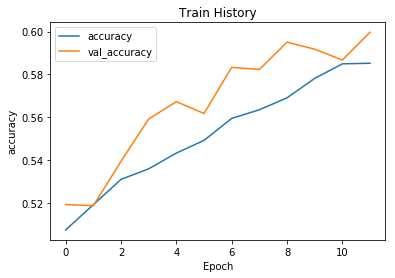

In [36]:
show_train_history('accuracy','val_accuracy')

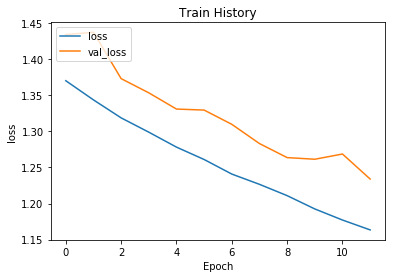

In [37]:
show_train_history('loss','val_loss')

### MSE

In [39]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [40]:
train_history = model.fit(x=x_Train,
                         y=y_Train,
                         validation_split=0.25,
                         epochs=12,
                         batch_size=128,
                         verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 409s 11ms/step - loss: 0.0533 - accuracy: 0.5983 - val_loss: 0.0563 - val_accuracy: 0.6059
Epoch 2/12
37500/37500 [==============================] - 425s 11ms/step - loss: 0.0532 - accuracy: 0.5991 - val_loss: 0.0562 - val_accuracy: 0.6067
Epoch 3/12
37500/37500 [==============================] - 423s 11ms/step - loss: 0.0533 - accuracy: 0.5977 - val_loss: 0.0562 - val_accuracy: 0.6054
Epoch 4/12
37500/37500 [==============================] - 463s 12ms/step - loss: 0.0530 - accuracy: 0.6001 - val_loss: 0.0562 - val_accuracy: 0.6070
Epoch 5/12
37500/37500 [==============================] - 379s 10ms/step - loss: 0.0528 - accuracy: 0.5993 - val_loss: 0.0560 - val_accuracy: 0.6068
Epoch 6/12
37500/37500 [==============================] - 378s 10ms/step - loss: 0.0529 - accuracy: 0.5993 - val_loss: 0.0559 - val_accuracy: 0.6102
Epoch 7/12
37500/37500 [==============================] 

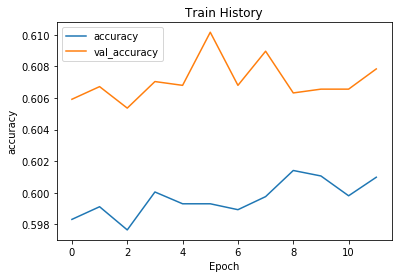

In [41]:
show_train_history('accuracy','val_accuracy')

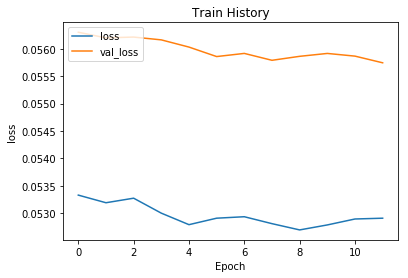

In [42]:
show_train_history('loss','val_loss')

### binary _crossentropy

In [43]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [44]:
train_history = model.fit(x=x_Train,
                         y=y_Train,
                         validation_split=0.25,
                         epochs=12,
                         batch_size=128,
                         verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 377s 10ms/step - loss: 0.0526 - accuracy: 0.6030 - val_loss: 0.0557 - val_accuracy: 0.6080
Epoch 2/12
37500/37500 [==============================] - 374s 10ms/step - loss: 0.0526 - accuracy: 0.6021 - val_loss: 0.0556 - val_accuracy: 0.6094
Epoch 3/12
37500/37500 [==============================] - 376s 10ms/step - loss: 0.0527 - accuracy: 0.6025 - val_loss: 0.0556 - val_accuracy: 0.6087
Epoch 4/12
37500/37500 [==============================] - 376s 10ms/step - loss: 0.0526 - accuracy: 0.6036 - val_loss: 0.0556 - val_accuracy: 0.6093
Epoch 5/12
37500/37500 [==============================] - 375s 10ms/step - loss: 0.0523 - accuracy: 0.6062 - val_loss: 0.0555 - val_accuracy: 0.6095
Epoch 6/12
37500/37500 [==============================] - 376s 10ms/step - loss: 0.0525 - accuracy: 0.6035 - val_loss: 0.0555 - val_accuracy: 0.6099
Epoch 7/12
37500/37500 [==============================] 

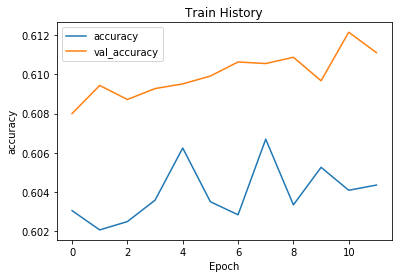

In [45]:
show_train_history('accuracy','val_accuracy')

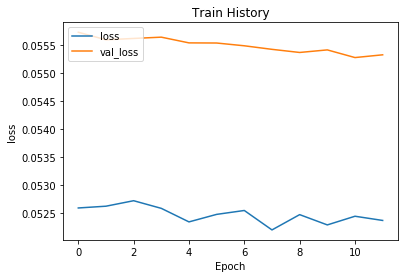

In [46]:
show_train_history('loss','val_loss')